In [1]:
%load_ext autoreload

In [40]:
%autoreload
from ctgan import CTGANSynthesizer
from ctgan import load_demo
df = load_demo()
df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [3]:
ctgan = CTGANSynthesizer(verbose=True, batch_size=200)
discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'income'
]

In [4]:
ctgan.fit(df, discrete_columns, epsilon=2, epochs=500)

/home/tecnarca/anaconda3/envs/opactgan/lib/python3.8/site-packages/opacus/privacy_engine.py:111: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_rng`` turned on.
  warnings.warn(


Epoch 1, epslion  0.33, Loss G:  1.6728, Loss D: -0.0861
Epoch 2, epslion  0.37, Loss G:  1.2195, Loss D: -0.1009
Epoch 3, epslion  0.41, Loss G:  0.1980, Loss D: -0.0051
Epoch 4, epslion  0.45, Loss G: -0.1147, Loss D:  0.0281
Epoch 5, epslion  0.49, Loss G: -0.2055, Loss D:  0.0299
Epoch 6, epslion  0.52, Loss G: -0.2071, Loss D:  0.0119
Epoch 7, epslion  0.56, Loss G: -0.1940, Loss D:  0.0068
Epoch 8, epslion  0.60, Loss G: -0.1558, Loss D:  0.0191
Epoch 9, epslion  0.63, Loss G: -0.1749, Loss D:  0.0087
Epoch 10, epslion  0.66, Loss G: -0.1496, Loss D: -0.0016
Epoch 11, epslion  0.70, Loss G: -0.1003, Loss D:  0.0101
Epoch 12, epslion  0.73, Loss G: -0.0843, Loss D:  0.0053
Epoch 13, epslion  0.75, Loss G: -0.0517, Loss D:  0.0008
Epoch 14, epslion  0.78, Loss G: -0.0988, Loss D:  0.0165
Epoch 15, epslion  0.81, Loss G: -0.0831, Loss D:  0.0128
Epoch 16, epslion  0.84, Loss G: -0.0448, Loss D: -0.0011
Epoch 17, epslion  0.86, Loss G: -0.0543, Loss D: -0.0003
Epoch 18, epslion  0.89

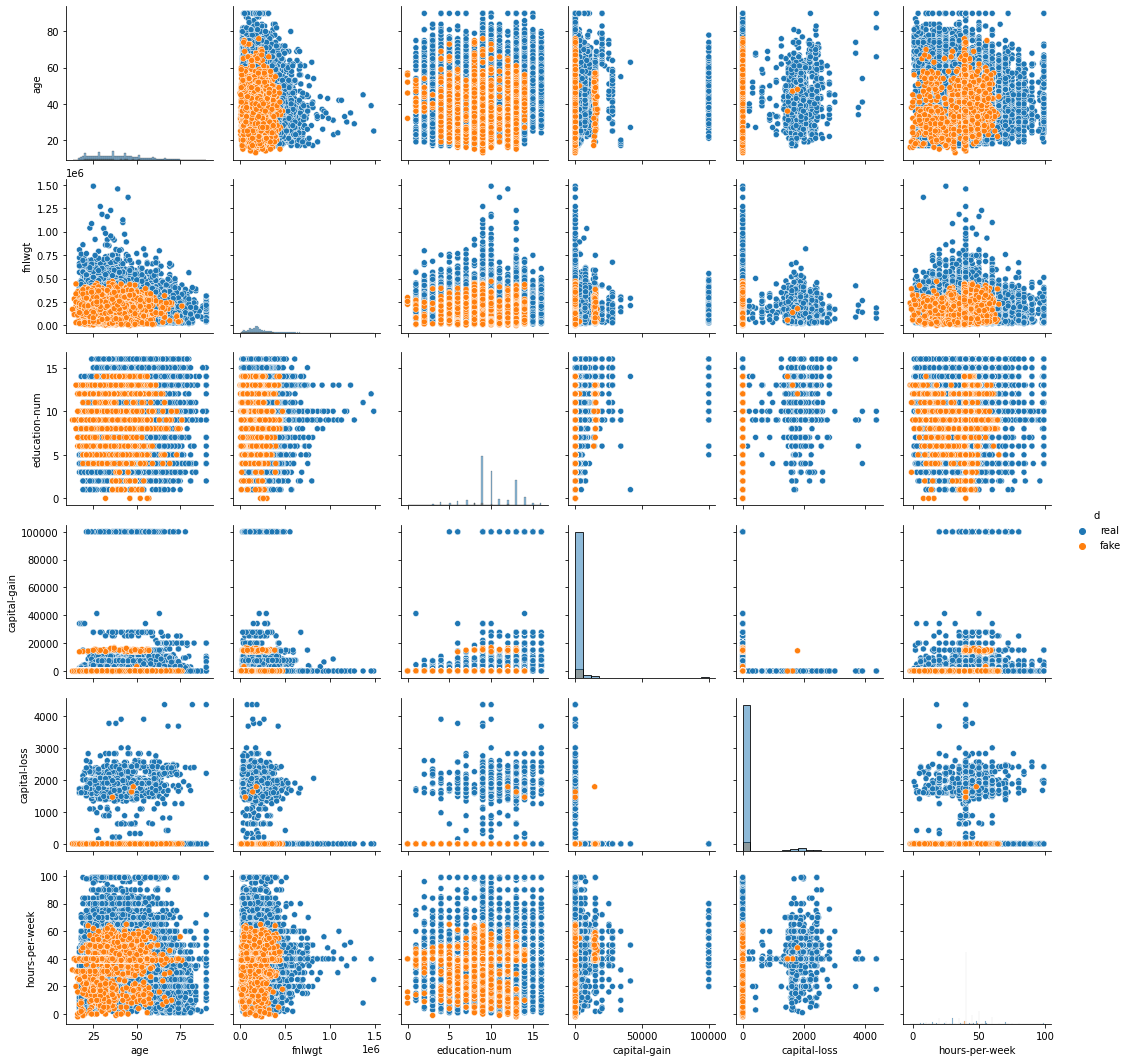

In [5]:
import pandas as pd
import seaborn as sns
fake_df = ctgan.sample(2000)
fake_df['d'] = 'fake'
df['d'] = 'real'
comp = pd.concat([df, fake_df])
sns.pairplot(comp, hue="d", diag_kind="hist")

In [6]:
ctgan2 = CTGANSynthesizer(verbose=True, dp=False, epochs=300)
ctgan2.fit(df.drop(['d'],axis=1), discrete_columns)
fake_df2 = ctgan2.sample(1000)

Epoch 1, epslion  inf, Loss G:  1.4855, Loss D: -0.1248
Epoch 2, epslion  inf, Loss G:  1.5098, Loss D: -0.2078
Epoch 3, epslion  inf, Loss G:  0.8758, Loss D: -0.1389
Epoch 4, epslion  inf, Loss G:  0.7342, Loss D: -0.1922
Epoch 5, epslion  inf, Loss G:  0.5986, Loss D: -0.2921
Epoch 6, epslion  inf, Loss G:  0.2789, Loss D: -0.2144
Epoch 7, epslion  inf, Loss G:  0.1835, Loss D: -0.2210
Epoch 8, epslion  inf, Loss G:  0.2845, Loss D: -0.2525
Epoch 9, epslion  inf, Loss G:  0.2251, Loss D: -0.2478
Epoch 10, epslion  inf, Loss G:  0.1195, Loss D: -0.2784
Epoch 11, epslion  inf, Loss G:  0.1894, Loss D: -0.3181
Epoch 12, epslion  inf, Loss G:  0.1506, Loss D: -0.3122
Epoch 13, epslion  inf, Loss G:  0.1099, Loss D: -0.3005
Epoch 14, epslion  inf, Loss G:  0.1348, Loss D: -0.2717
Epoch 15, epslion  inf, Loss G: -0.0196, Loss D: -0.2571
Epoch 16, epslion  inf, Loss G:  0.1127, Loss D: -0.3417
Epoch 17, epslion  inf, Loss G:  0.0231, Loss D: -0.2948
Epoch 18, epslion  inf, Loss G:  0.0130,

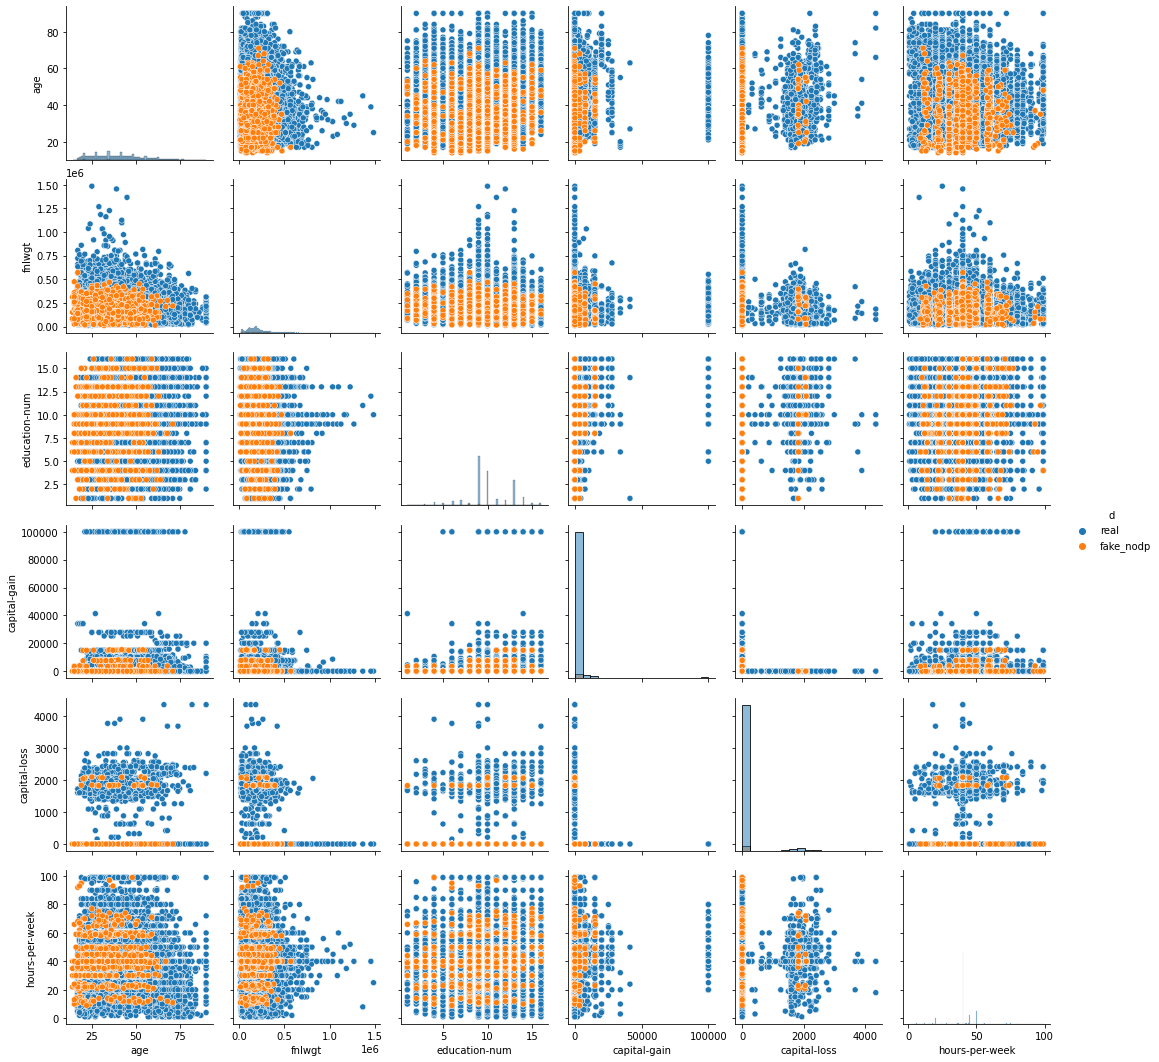

In [7]:
fake_df2['d'] = 'fake_nodp'
comp = pd.concat([df, fake_df2])
sns.pairplot(comp, hue="d", diag_kind="hist")

In [9]:
import numpy as np
n=10000
np.random.seed(42)
v0=np.random.chisquare(2,n)
v1=9*np.random.random_sample(n)
v2=np.random.exponential(3,n)+v1
v3=(v1<8)+0
v4=(v2>2.7+np.random.randn(n))+0
v5=((np.random.uniform(0,1,n))>0.1)+0
v6=np.random.randn(n)+10
v7=np.random.chisquare(5,n)+v6+10
v8=v1+np.random.randn(n)+v6+10
v9=v0+v1+v2+10
v10=v5+v6+v7+10
D=pd.DataFrame([v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10],index=['v0','v1','v2','v3','v4','v5','v6','v7','v8','v9','v10']).transpose()
D.corr()

v0        v1        v2        v3        v4        v5        v6  \
v0   1.000000  0.002198 -0.003685  0.005749 -0.001960 -0.015369 -0.001077   
v1   0.002198  1.000000  0.644409 -0.549538  0.440971 -0.001741  0.000273   
v2  -0.003685  0.644409  1.000000 -0.351739  0.476710  0.003575 -0.003145   
v3   0.005749 -0.549538 -0.351739  1.000000 -0.124097  0.008614  0.001518   
v4  -0.001960  0.440971  0.476710 -0.124097  1.000000  0.016602  0.005771   
v5  -0.015369 -0.001741  0.003575  0.008614  0.016602  1.000000 -0.005086   
v6  -0.001077  0.000273 -0.003145  0.001518  0.005771 -0.005086  1.000000   
v7   0.001054  0.004406 -0.005823 -0.010937  0.000250  0.000087  0.305915   
v8   0.001287  0.875973  0.563077 -0.485263  0.386227 -0.007167  0.343106   
v9   0.311173  0.821678  0.893949 -0.447874  0.481954 -0.003293 -0.002192   
v10 -0.000566  0.003826 -0.005696 -0.008577  0.003061  0.077482  0.535386   

           v7        v8        v9       v10  
v0   0.001054  0.001287  0.311173 -0.000566  
v1   0.004406  0.875973  0.821678  0.003826  
v2  -0.005823  0.563077  0.893949 -0.005696  
v3  -0.010937 -0.485263 -0.447874 -0.008577  
v4   0.000250  0.386227  0.481954  0.003061  
v5   0.000087 -0.007167 -0.003293  0.077482  
v6   0.305915  0.343106 -0.002192  0.535386  
v7   1.000000  0.111834 -0.001476  0.964395  
v8   0.111834  1.000000  0.718687  0.189336  
v9  -0.001476  0.718687  1.000000 -0.002145  
v10  0.964395  0.189336 -0.002145  1.000000

In [48]:
dp = CTGANSynthesizer(verbose=True, batch_size=100, noise_multiplier=2, pack=1)
dp.fit(D.drop(['d'], axis=1), ['v3', 'v4', 'v5'], epsilon=2, epochs=300)
fakeD = dp.sample(500)

/home/tecnarca/anaconda3/envs/opactgan/lib/python3.8/site-packages/opacus/privacy_engine.py:111: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_rng`` turned on.
  warnings.warn(


Epoch 1, epslion  0.39, Loss G:  0.4121, Loss D:  0.0265
Epoch 2, epslion  0.45, Loss G:  0.1171, Loss D:  0.0295
Epoch 3, epslion  0.51, Loss G:  0.0416, Loss D:  0.0021
Epoch 4, epslion  0.56, Loss G:  0.0093, Loss D: -0.0034
Epoch 5, epslion  0.62, Loss G:  0.0150, Loss D:  0.0127
Epoch 6, epslion  0.67, Loss G:  0.0099, Loss D:  0.0115
Epoch 7, epslion  0.72, Loss G:  0.0428, Loss D: -0.0057
Epoch 8, epslion  0.77, Loss G:  0.0106, Loss D:  0.0163
Epoch 9, epslion  0.82, Loss G:  0.0678, Loss D: -0.0271
Epoch 10, epslion  0.86, Loss G:  0.0436, Loss D: -0.0058
Epoch 11, epslion  0.90, Loss G:  0.0249, Loss D:  0.0296
Epoch 12, epslion  0.94, Loss G:  0.0641, Loss D: -0.0162
Epoch 13, epslion  0.98, Loss G:  0.0658, Loss D: -0.0262
Epoch 14, epslion  1.01, Loss G:  0.0382, Loss D:  0.0060
Epoch 15, epslion  1.05, Loss G:  0.0469, Loss D:  0.0031
Epoch 16, epslion  1.08, Loss G:  0.0700, Loss D: -0.0086
Epoch 17, epslion  1.11, Loss G:  0.0726, Loss D:  0.0026
Epoch 18, epslion  1.15

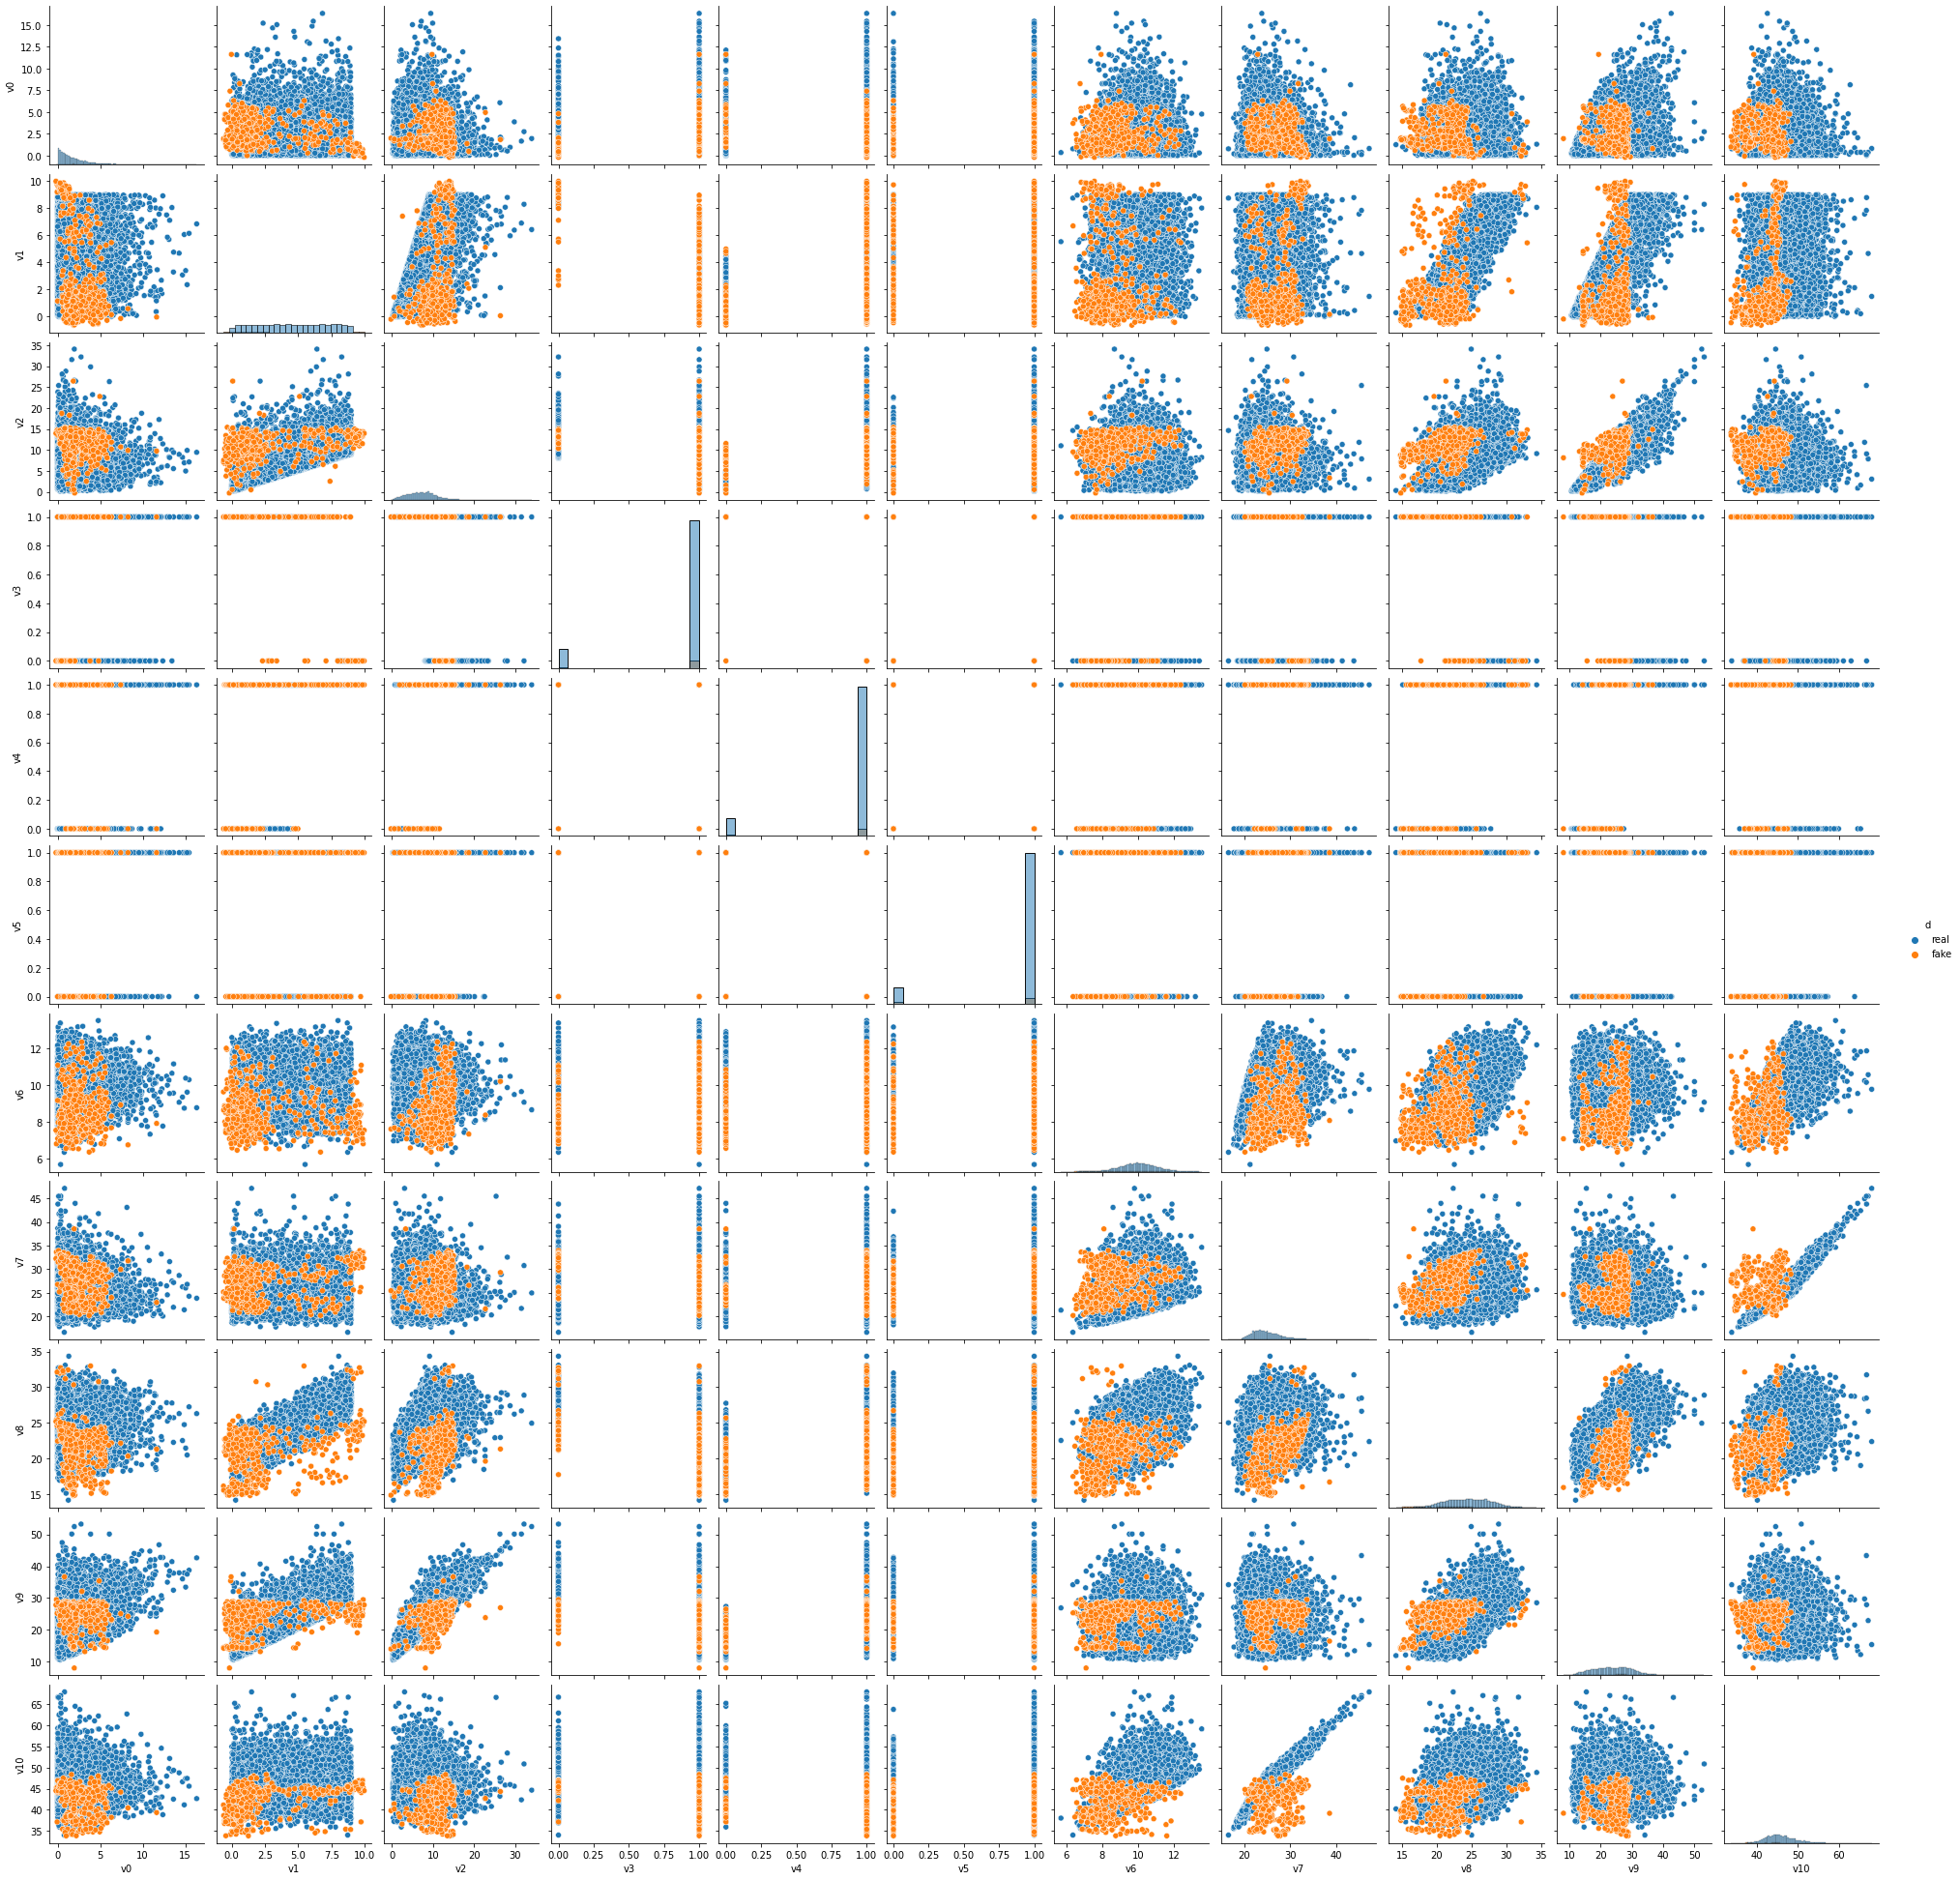

In [49]:
fakeD['d'] = 'fake'
D['d'] = 'real'
comp = pd.concat([D, fakeD])
sns.pairplot(comp, hue="d", diag_kind="hist")

In [46]:
dp = CTGANSynthesizer(verbose=True, batch_size=500, noise_multiplier=2, pack=1, dp=False)
dp.fit(D.drop(['d'], axis=1), ['v3', 'v4', 'v5'], epsilon=2, epochs=100)
fakeD = dp.sample(500)

Epoch 1, epslion  inf, Loss G:  0.2274, Loss D:  0.3476
Epoch 2, epslion  inf, Loss G: -0.2494, Loss D:  0.6317
Epoch 3, epslion  inf, Loss G: -0.0552, Loss D:  0.1480
Epoch 4, epslion  inf, Loss G: -0.1078, Loss D:  0.0342
Epoch 5, epslion  inf, Loss G: -0.2604, Loss D:  0.0358
Epoch 6, epslion  inf, Loss G: -0.4020, Loss D:  0.0219
Epoch 7, epslion  inf, Loss G: -0.4436, Loss D: -0.0559
Epoch 8, epslion  inf, Loss G: -0.4459, Loss D: -0.1344
Epoch 9, epslion  inf, Loss G: -0.3814, Loss D: -0.2018
Epoch 10, epslion  inf, Loss G: -0.6365, Loss D: -0.0165
Epoch 11, epslion  inf, Loss G: -0.6013, Loss D: -0.0460
Epoch 12, epslion  inf, Loss G: -0.6546, Loss D: -0.0703
Epoch 13, epslion  inf, Loss G: -0.6461, Loss D: -0.0967
Epoch 14, epslion  inf, Loss G: -0.7104, Loss D: -0.0336
Epoch 15, epslion  inf, Loss G: -0.6887, Loss D: -0.0821
Epoch 16, epslion  inf, Loss G: -0.7142, Loss D: -0.0741
Epoch 17, epslion  inf, Loss G: -0.8288, Loss D: -0.0328
Epoch 18, epslion  inf, Loss G: -0.8631,

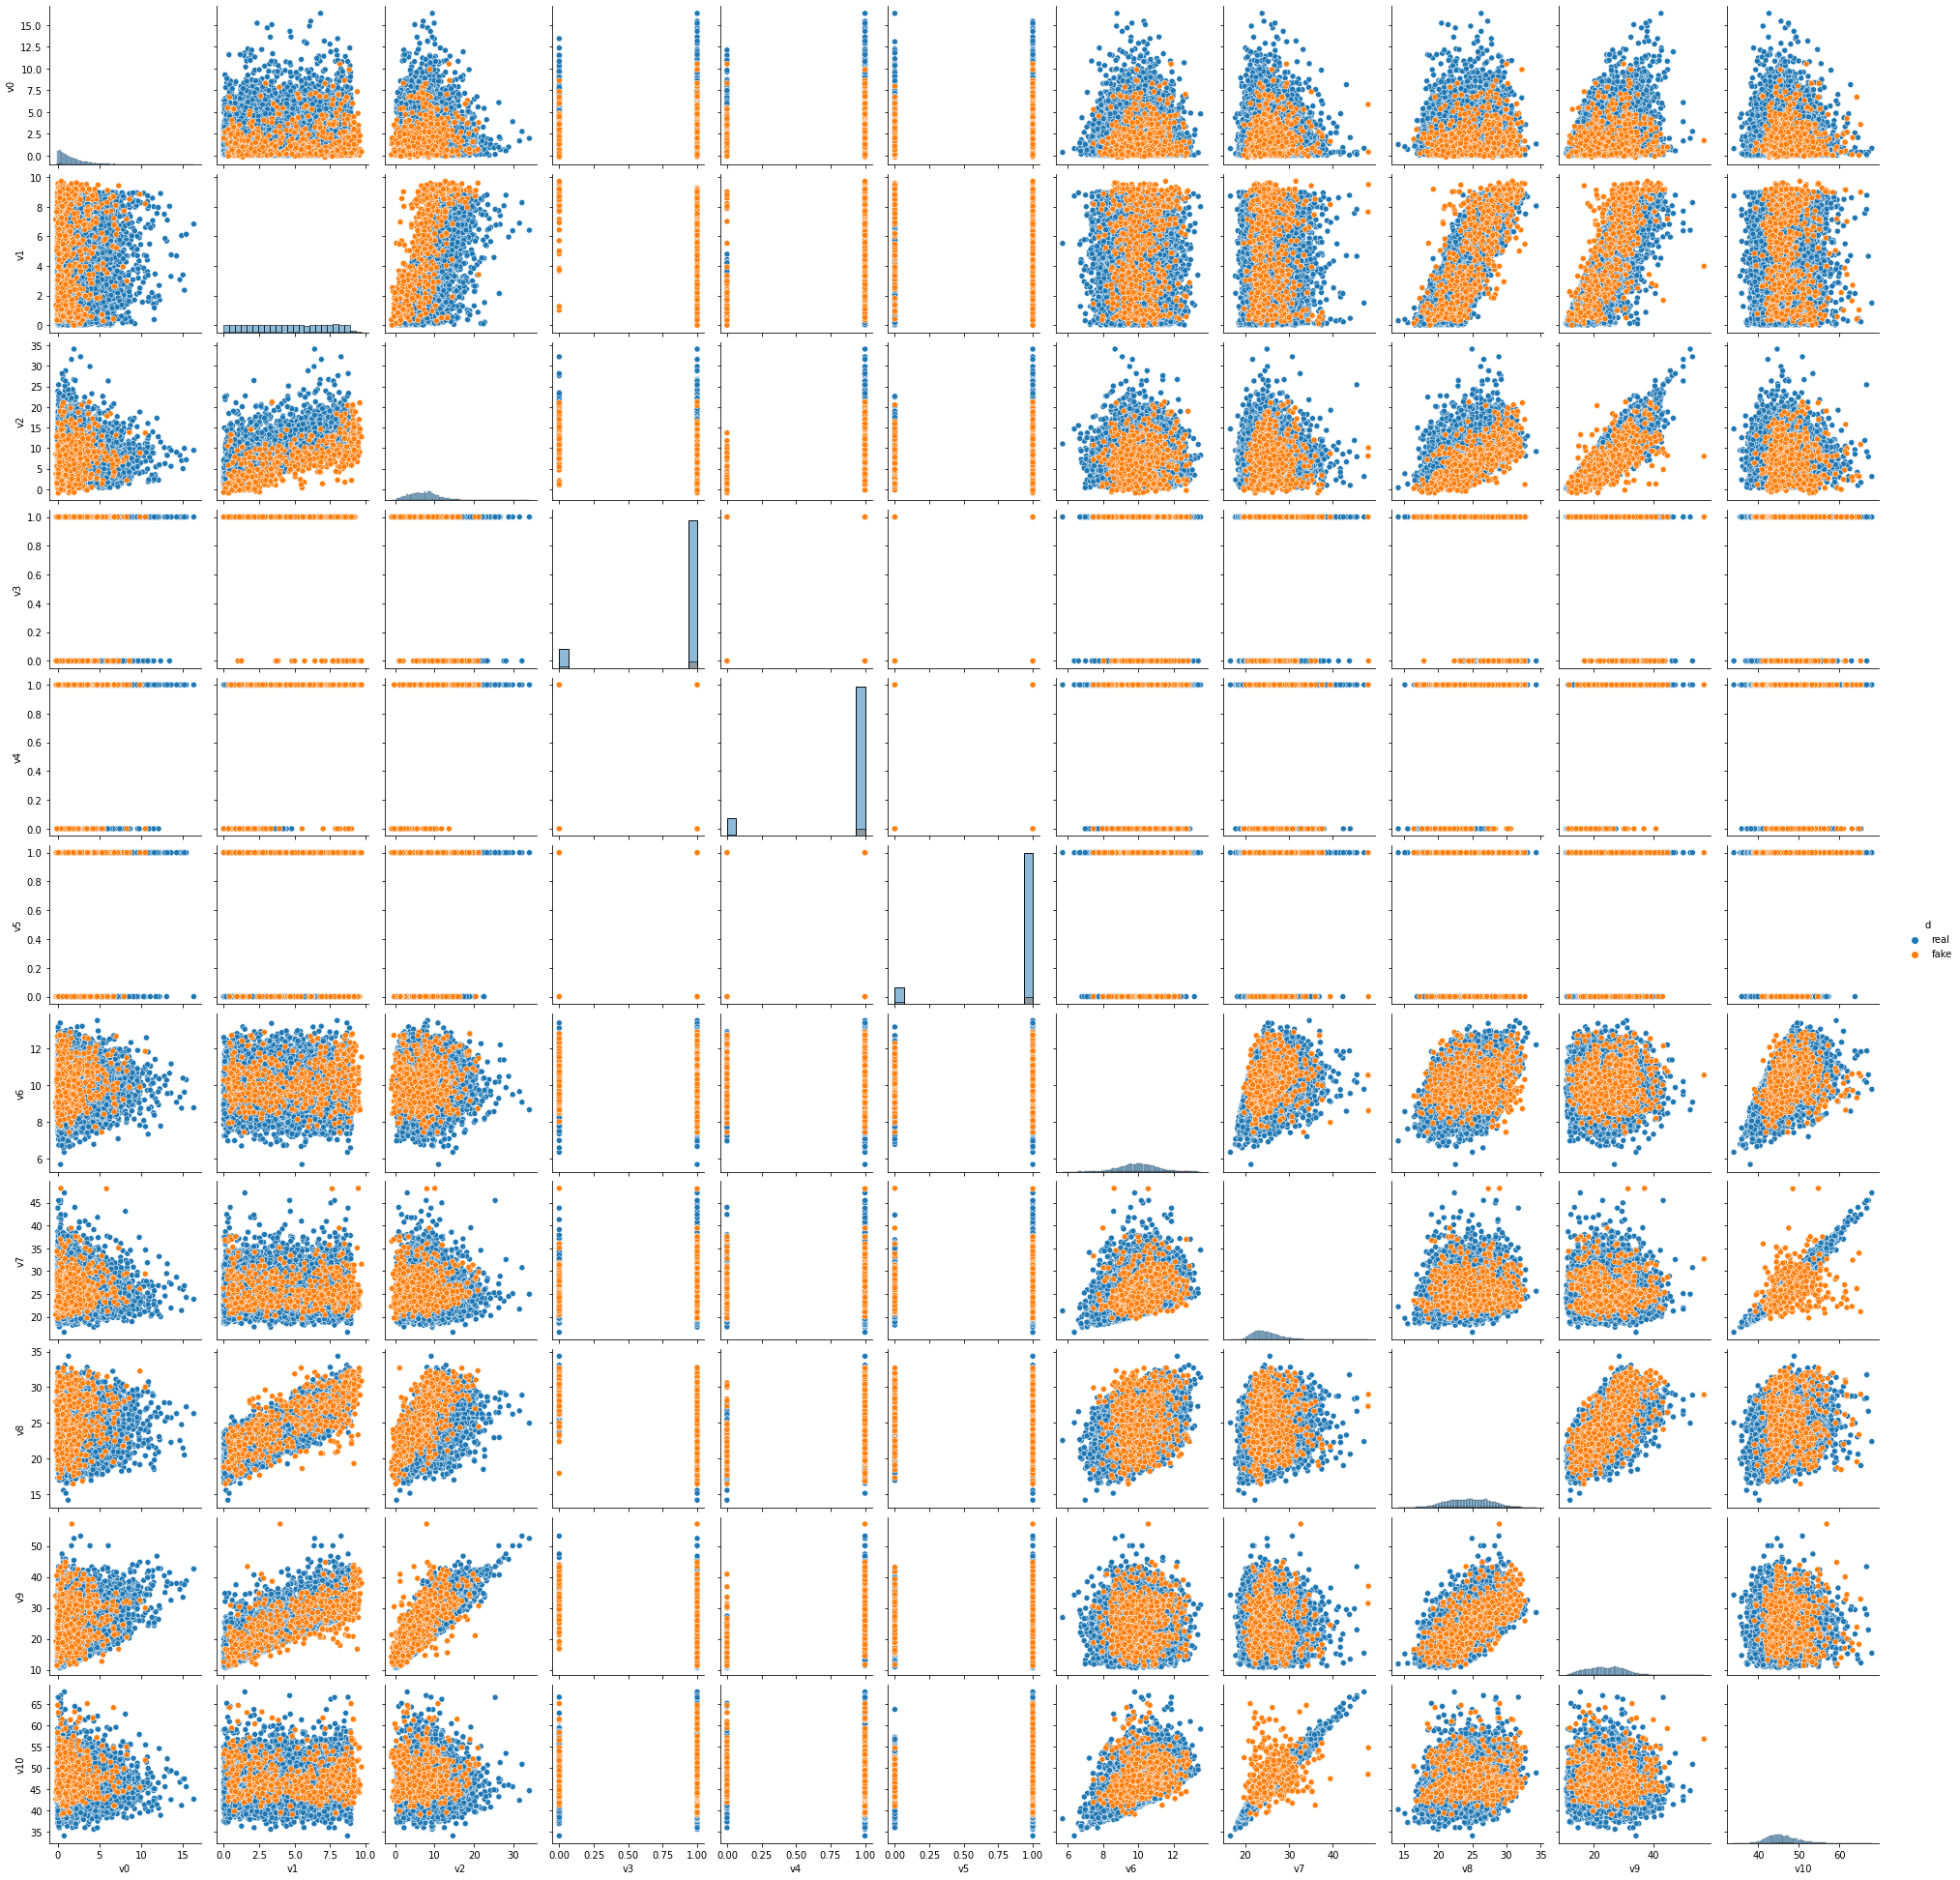

In [47]:
fakeD['d'] = 'fake'
D['d'] = 'real'
comp = pd.concat([D, fakeD])
sns.pairplot(comp, hue="d", diag_kind="hist")